In [1]:
from __future__ import division

import time
import gzip

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap("gray")
plt.rcParams["image.interpolation"] = None

In [2]:
import TN_utils
reload(TN_utils)

<module 'TN_utils' from 'TN_utils.pyc'>

In [3]:
feature_vec_36 = TN_utils.load_featureImg_r(1)
feature_vec_12 = TN_utils.load_featureImg_r(12)
print feature_vec_36.shape

(65536, 60, 2)


In [4]:
with gzip.open("../data/toytreerot_imgGT.npy.gz", "r") as f:
    GT_vec_array = np.load(f)
GT_vec_36 = GT_vec_array[0]
GT_vec_12 = GT_vec_array[11]

In [5]:
with gzip.open("../data/toytreerot_mask.npy.gz", "r") as f:
    mask_vec_array = np.load(f)
mask_vec_36 = mask_vec_array[0]
mask_vec_12 = mask_vec_array[11]

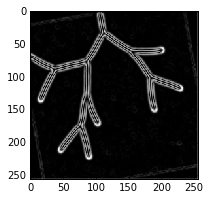

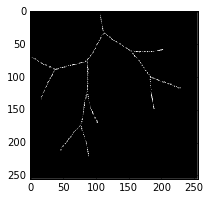

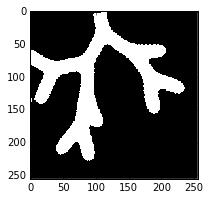

In [6]:
# V test load_toytreefeature_mat
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(feature_vec_36, axis=2)[:, 12].reshape((256, 256)))

plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(GT_vec_36, axis=1).reshape((256, 256))) 

plt.figure(figsize=(3, 3))
plt.imshow(mask_vec_36.reshape((256, 256)))

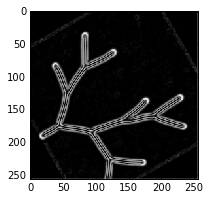

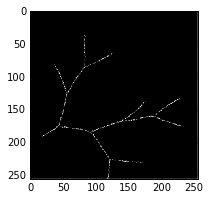

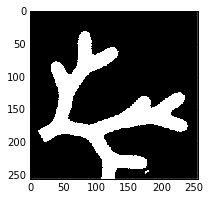

In [7]:
# V test load_toytreefeature_mat
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(feature_vec_12, axis=2)[:, 12].reshape((256, 256)))

plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(GT_vec_12, axis=1).reshape((256, 256))) 

plt.figure(figsize=(3, 3))
plt.imshow(mask_vec_12.reshape((256, 256)))

In [8]:
m_feature_vec36 = feature_vec_36[mask_vec_36][:, 12:24]
m_GT_vec36 = GT_vec_36[mask_vec_36]
print m_feature_vec36.shape, m_GT_vec36.shape

(13857, 12, 2) (13857, 2)


In [9]:
m_feature_vec12 = feature_vec_12[mask_vec_12][:, 12:24]
m_GT_vec12 = GT_vec_12[mask_vec_12]
print m_feature_vec12.shape, m_GT_vec12.shape

(13597, 12, 2) (13597, 2)


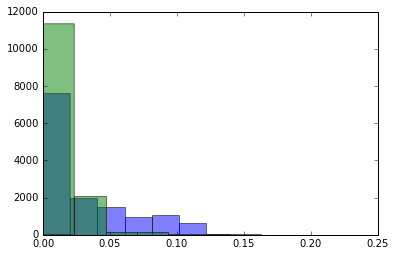

In [10]:
# V 正規化されてない
gomi = plt.hist(np.linalg.norm(m_feature_vec36, axis=2)[:, 1], alpha=0.5)
gomi = plt.hist(np.linalg.norm(m_feature_vec36, axis=2)[:, 10], alpha=0.5)

In [11]:
normed_m_feature_vec36, norm_coef = TN_utils.normalize_feature_vec(m_feature_vec36)

In [12]:
normed_m_feature_vec12, norm_coef = TN_utils.normalize_feature_vec(m_feature_vec12)

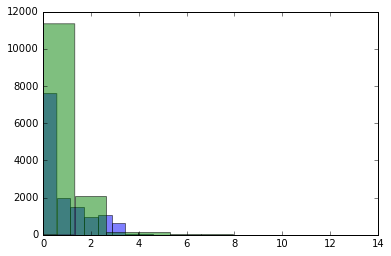

In [13]:
# V まあまあされてる
gomi = plt.hist(np.linalg.norm(normed_m_feature_vec36, axis=2)[:, 1], alpha=0.5)
gomi = plt.hist(np.linalg.norm(normed_m_feature_vec36, axis=2)[:, 10], alpha=0.5)

In [14]:
import RC1layer
reload(RC1layer)

Couldn't import dot_parser, loading of dot files will not be possible.


<module 'RC1layer' from 'RC1layer.pyc'>

In [16]:
result = RC1layer.ab(normed_m_feature_vec36, m_GT_vec36,
                normed_m_feature_vec12, m_GT_vec12,
                out_activation="ReLU")

In [17]:
f_train, f_training_error, f_test_error, f_output, s_input, s_target, param2_list = result

In [40]:
n_tensor = 12
param2_list[0].set_value(0.01*np.random.normal(size=(n_tensor, )))
param2_list[1].set_value(0.01*np.random.normal(size=(n_tensor, )))
param2_list[2].set_value(0.)

In [41]:
lr = 0.5
reg2 = 0.
batch_size = 100
n_batchs = s_input.get_value(borrow=True).shape[0] // batch_size

n_epochs = 300
interval = 10
training_error_array = np.zeros((n_epochs // interval,))
test_error_array = np.zeros((n_epochs // interval,))

In [42]:
for i_epoch in xrange(n_epochs):
    for i_batch in xrange(n_batchs):
        f_train(i_batch, lr, reg2, batch_size)
    
    if i_epoch == 10:
        batch_size = 1000

    if i_epoch % interval == 0:
        training_error = f_training_error()[0]
        training_error_array[i_epoch // interval] = training_error
        test_error = f_test_error()[0]
        test_error_array[i_epoch // interval] = test_error
        print i_epoch, training_error, test_error

0 0.00517996355847 0.00511525930172
10 0.00423653454735 0.00412453282925
20 0.0036377134611 0.00353443920586
30 0.00361542704948 0.00351880473319
40 0.00364696359015 0.00355517006129
50 0.00367689261146 0.0035888579973
60 0.0036995827873 0.00361420422877
70 0.00371560329992 0.00363226645648
80 0.00372564044254 0.00364385543777
90 0.00373069421472 0.00365009341842
100 0.00373229113827 0.0036525178007
110 0.003731594068 0.00365234882961
120 0.00372936613946 0.00365048072524
130 0.00372619946376 0.00364757283159
140 0.00372237855186 0.00364406641466
150 0.00371831678172 0.0036402578886
160 0.00371416620155 0.00363628487031
170 0.00371005758125 0.00363234737514
180 0.00370558360055 0.00362801480076
190 0.00370169244167 0.00362425260768
200 0.0036980434366 0.00362073380193
210 0.00369463427757 0.00361740697328
220 0.00369146140179 0.00361432787768
230 0.00368852473223 0.00361148516359
240 0.00368582893734 0.00360885341516
250 0.00368336664305 0.00360645583807
260 0.00368111651315 0.00360429

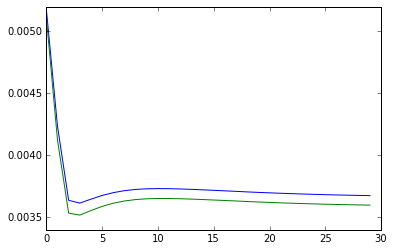

In [43]:
# V
plt.plot(training_error_array)
plt.plot(test_error_array)

In [44]:
import os
if not os.path.isdir("../results/RC1_toytree12"):
    os.makedirs("../results/RC1_toytree12")

with open("../results/RC1_toytree12/training_error_array.npy", "w") as f:
    np.save(f, training_error_array)
with open("../results/RC1_toytree12/test_error_array.npy", "w") as f:
    np.save(f, test_error_array)
gt2_vec = f_output(feature_vec_36[:, 12:24]/norm_coef[:, np.newaxis])[0]
gt1_img = TN_utils.convert_gt2vec_to_gt1img(gt2_vec, img_shape=(256, 256))
sio.savemat('../results/RC1_toytree12/v_train.mat', {'v_train': gt1_img})

feature_vec_12 = TN_utils.load_featureImg_r(12)[:, 12:24]
gt2_vec_12 = f_output(feature_vec_12/norm_coef[:, np.newaxis])[0]
gt1_img_12 = TN_utils.convert_gt2vec_to_gt1img(gt2_vec_12, img_shape=(256, 256))
sio.savemat('../results/RC1_toytree12/v_test.mat', {'v_test': gt1_img_12})

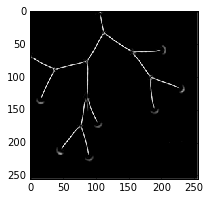

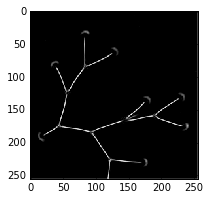

In [45]:
# V
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(gt1_img, axis=0).T)

plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(gt1_img_12, axis=0).T)

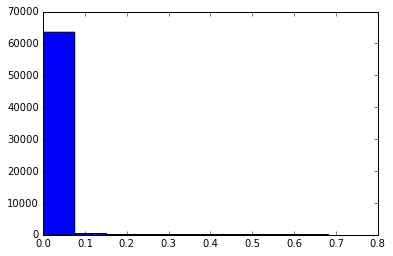

In [23]:
# V
gomi = plt.hist(np.linalg.norm(gt1_img, axis=0).flatten())